# TP FINAL

ANA GUZMÁN

En esta notebook se hará un pequeño análisis de datos para poder convertir variables categóricas en numéricas, y se aplicaran dos modelos de regresión y dos de clasificación.

## Importamos liberias

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from metrics import MSE
from sklearn.metrics import precision_score
from sklearn.cluster import KMeans

## Cargamos los datos

In [2]:
data = pd.read_csv("./Data/possum.csv")

In [3]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
data.shape

(104, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
data.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [7]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

## Codificación y análisis de correlación

In [8]:
data["sex"].value_counts()

m    61
f    43
Name: sex, dtype: int64

Binarizamos la categoría sex:

In [9]:
def convert_sex_to_int(x):
 
    if x =="f":
        return 1
    else:
        return 0
data["sex"] = data["sex"].apply(convert_sex_to_int)

Dropeamos las columnas "pop" y "case"

In [10]:
data = data.drop(["case","Pop"], axis = 1)

In [11]:
data.head()

,site,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Regresión

Calculamos coeficiente de Pearson para analizar la correlación entre las variables con respecto a nuestra variable target "totlngth" para predicción.

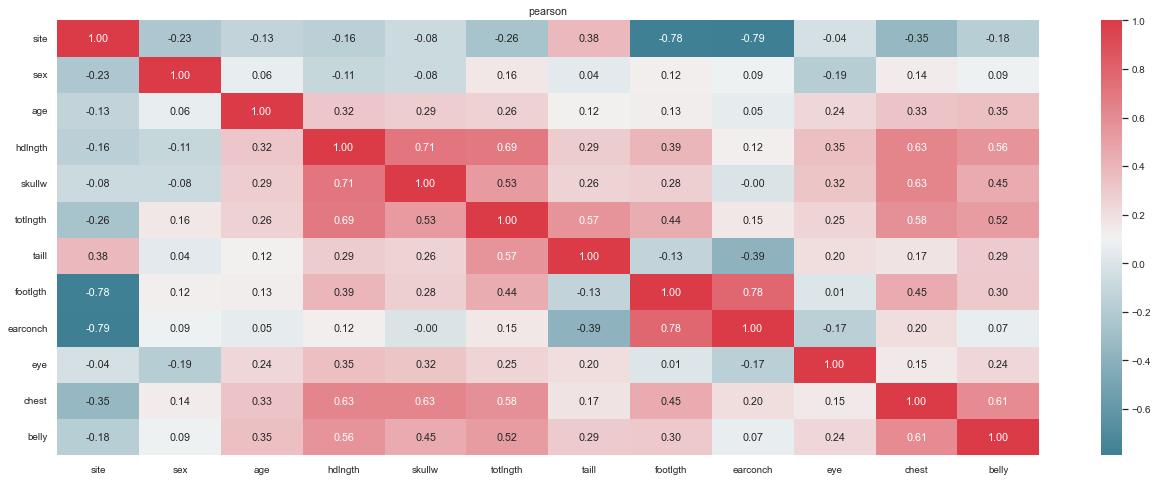

In [13]:
fig, axes = plt.subplots(1,1,figsize=(22,8))

tau = data.corr(method='pearson')
axes.set_title("pearson")
sns.heatmap(tau, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

Todas las variables matienen correlación con la variable Target. No dropeamos ninguna de ellas. 

In [129]:
y = data['totlngth']
X = data.drop('totlngth', axis = 1)

In [130]:
X.head()

,site,sex,age,hdlngth,skullw,taill,footlgth,earconch,eye,chest,belly
0,1,0,8.0,94.1,60.4,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,6.0,92.5,57.6,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,6.0,94.0,60.0,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,6.0,93.2,57.1,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,2.0,91.5,56.3,36.0,71.0,53.2,15.1,28.5,33.0


In [131]:
X.shape

(104, 11)

In [132]:
y.shape

(104,)

Separamos en train y test

In [133]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [138]:
x_train.isnull().sum()

site        0
sex         0
age         2
hdlngth     0
skullw      0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [139]:
x_test.isnull().sum()

site        0
sex         0
age         0
hdlngth     0
skullw      0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

sólo tenemos datos faltantes en x_train, imputamos la media de la columna en los tres valores faltantes.

In [140]:
x_train.fillna(x_train.mean(), inplace=True)

In [141]:
x_train.isnull().sum()

site        0
sex         0
age         0
hdlngth     0
skullw      0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

## PCA

Escalamos los datos de train y test

In [142]:
scaler = StandardScaler()
scaler_x = scaler.fit(x_train)
x_train_scaled = scaler_x.transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

In [143]:
pca = PCA(n_components=0.9, random_state=2).fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

La cantidad de componentes principales con los que nos quedamos para mantener el 90% de la varianza. 

In [144]:
x_train_pca.shape[1]

7

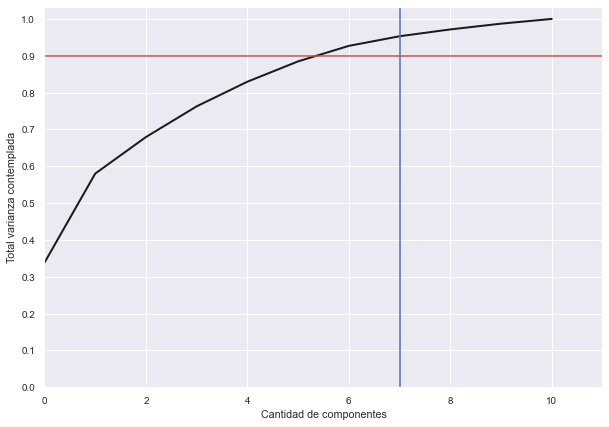

In [145]:
pca_2 = PCA(n_components=11, random_state=2).fit(x_train_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(7, c='b')
plt.axhline(0.9, c='r')
plt.show();

Con 7 componentes nos quedamos con un poco más del 90% de la varianza. 

### Modelos

### 1. Regresión lineal con Ridge + bias

In [146]:
linear_regression_R = Ridge(alpha=1.0, fit_intercept=True, random_state=2)
linear_regression_R.fit(x_train_pca, y_train)

Ridge(random_state=2)

vemos los coeficientes y el bias calculado por el modelo

In [147]:
linear_regression_R.coef_

array([-1.64010095, -0.48543129,  0.69514194,  0.84888843, -1.5233957 ,
       -0.54238263, -0.84068859])

In [148]:
linear_regression_R.intercept_

86.99036144578314

Hacemos predicción sobre test

In [149]:
pred = linear_regression_R.predict(x_test_pca)

Calculamos mse y r2

In [150]:
mse = MSE()

In [151]:
lrr_mse = mse(y_test, pred)
lrr_mse

5.466516003127017

In [152]:
r2 = linear_regression_R.score(x_train_pca, y_train, linear_regression_R.predict(x_train_pca))
r2

0.74162214585101

No es un mal modelo, probamos ahora con Lasso

### 2. Regresión Lineal con Lasso + bias

In [153]:
linear_regression_L = linear_model.Lasso(alpha=1.0, fit_intercept=True, random_state=2)
linear_regression_L.fit(x_train_pca, y_train)

Lasso(random_state=2)

vemos los coeficientes y el bias calculado por el modelo

In [154]:
linear_regression_L.coef_

array([-1.37668119, -0.11170935,  0.        ,  0.        , -0.1887359 ,
       -0.        , -0.        ])

In [155]:
linear_regression_L.intercept_

86.99036144578314

Hacemos predicción sobre test

In [156]:
pred_L = linear_regression_L.predict(x_test_pca)

Calculamos mse y r2

In [157]:
lrl_mse = mse(y_test, pred_L)
lrl_mse

7.631941123493864

In [158]:
r2_L = linear_regression_L.score(x_train_pca, y_train, linear_regression_L.predict(x_train_pca))
r2_L

0.5460124289296185

#### graficamos las lineas de predicción para ambos modelos en la componente 1. 

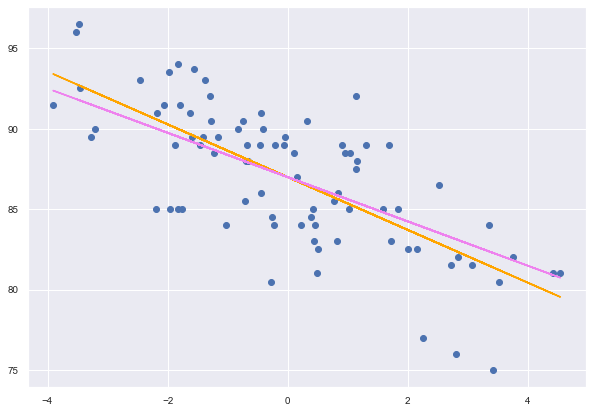

In [171]:
f , ax = plt.subplots(figsize =(10,7))
ax.scatter(x_train_pca[:,0], y_train)

ax.plot(x_train_pca[:,0], linear_regression_R.coef_[0]*x_train_pca[:,0] + linear_regression_R.intercept_, color = 'orange')
ax.plot(x_train_pca[:,0], linear_regression_L.coef_[0]*x_train_pca[:,0] + linear_regression_L.intercept_, color='violet')


plt.show()

Vemos que ridge tiene un mejor acercamiento al comportamiento de los datos hasta donde pueden ser representados. 

## Clasificación

1. Calculamos coeficiente de kendall para ver la correlación entre las variables numéricas y  target  "sex".

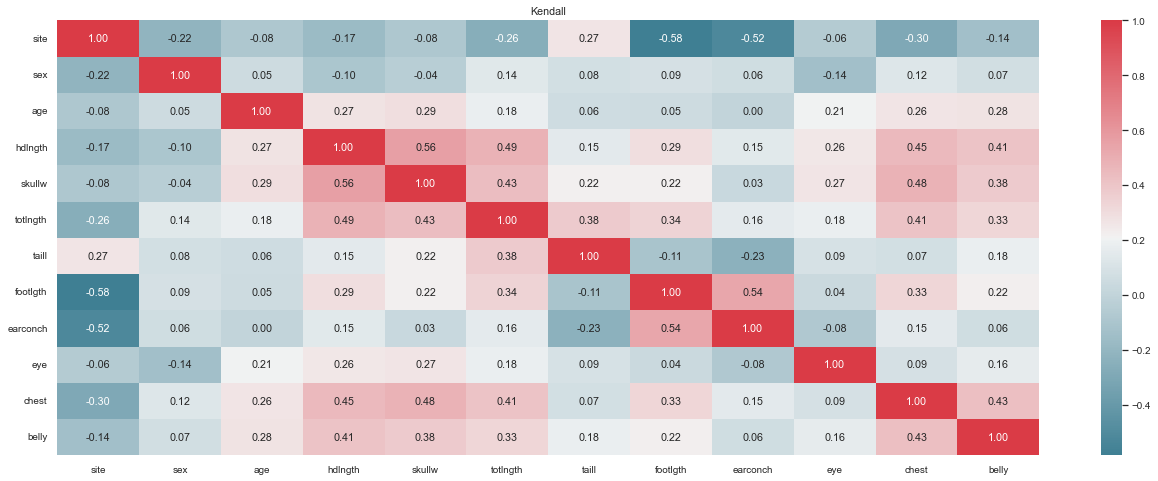

In [118]:
fig, axes = plt.subplots(1,1,figsize=(22,8))

tau = data.corr(method='kendall')
axes.set_title("Kendall")
sns.heatmap(tau, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

La correlación de 'sex' con las otras variables no es mucha y todas se mantienen en valores muy bajos. Voy a mantener todas las variables y hacer pca sobre todo el dataset. 

In [165]:
y_2 = data['sex']
x_2 = data.drop('sex', axis = 1)

In [172]:
x_2.head()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Separamos en train y test

In [166]:
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size = 0.20, random_state = 2)

In [167]:
x_2_train.isnull().sum()

site        0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [169]:
x_2_test.isnull().sum()

site        0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

sólo tenemos datos faltantes en x_train, imputamos la media de la columna en los tres valores faltantes.

In [173]:
x_2_train.fillna(x_2_train.mean(), inplace=True)

In [175]:
x_2_train.isnull().sum()

site        0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

### PCA

Escalamos los datos sobre train y test

In [178]:
scaler = StandardScaler()
scaler_x_2 = scaler.fit(x_2_train)
x_2_train_scaled = scaler_x_2.transform(x_2_train)
x_2_test_scaled = scaler_x_2.transform(x_2_test)

In [179]:
pca = PCA(n_components=0.9, random_state=2).fit(x_2_train_scaled)
x_2_train_pca = pca.transform(x_2_train_scaled)
x_2_test_pca = pca.transform(x_2_test_scaled)

La cantidad de componentes principales con los que nos quedamos para mantener el 90% de la varianza. 

In [180]:
x_2_train_pca.shape[1]

6

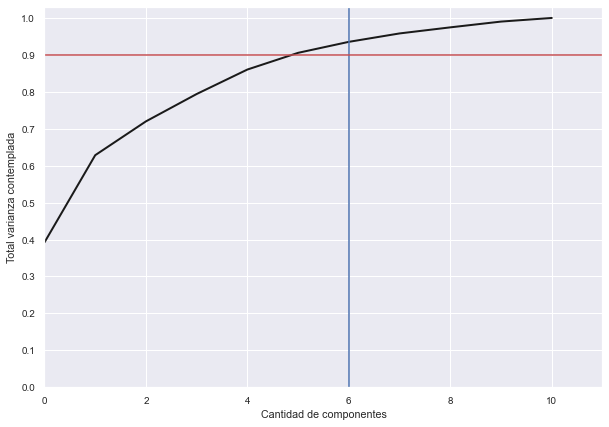

In [182]:
pca_2 = PCA(n_components=11, random_state=2).fit(x_2_train_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.9, c='r')
plt.show();

### Modelos

### 1. Regresión logística + Lasso 

In [212]:
rg = SGDClassifier(loss = 'log', l1_ratio=0.01, verbose=1, penalty='l1', max_iter=10000)
rg.fit(x_2_train_pca, y_2_train)

-- Epoch 1
Norm: 43.00, NNZs: 6, Bias: -3.162075, T: 83, Avg. loss: 23.307279
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 47.28, NNZs: 6, Bias: 3.467084, T: 166, Avg. loss: 19.956657
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 65.48, NNZs: 6, Bias: -30.216960, T: 249, Avg. loss: 20.075219
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 48.63, NNZs: 6, Bias: -17.792550, T: 332, Avg. loss: 20.085815
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 47.29, NNZs: 6, Bias: -7.198090, T: 415, Avg. loss: 15.920871
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 54.21, NNZs: 6, Bias: -20.176816, T: 498, Avg. loss: 15.724767
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 56.44, NNZs: 5, Bias: -12.693564, T: 581, Avg. loss: 13.518818
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 56.65, NNZs: 6, Bias: -5.419285, T: 664, Avg. loss: 11.439606
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 58.50, NNZs: 6, Bias: -9.514587, T: 747, Avg. loss: 10.631289
Total t

SGDClassifier(l1_ratio=0.01, loss='log', max_iter=10000, penalty='l1',
              verbose=1)

In [213]:
intercept = -(rg.intercept_/rg.coef_[0][1])
print(intercept)

[0.36398445]


In [214]:
slope = -(rg.coef_[0][0]/ rg.coef_[0][1])
print(slope)

-0.1272495857156827


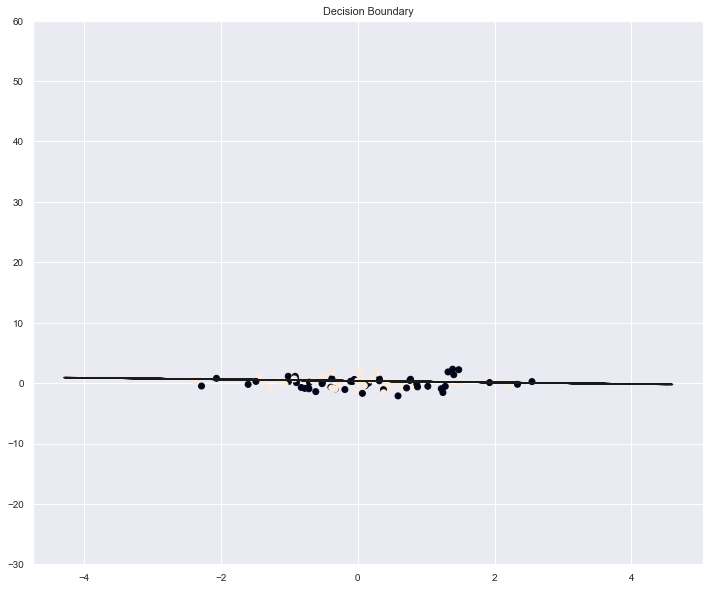

In [215]:
plt.figure(figsize=(12,10))
plt.scatter(x_2_train_pca[:, 2], x_2_train_pca[:, 3], c=y_2_train[:])
y_vals = intercept + (slope * x_2_train_pca[:, 0])
plt.plot(x_2_train_pca[:, 0], y_vals, c="k")
plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

In [216]:
pred = rg.predict(x_2_test_pca)

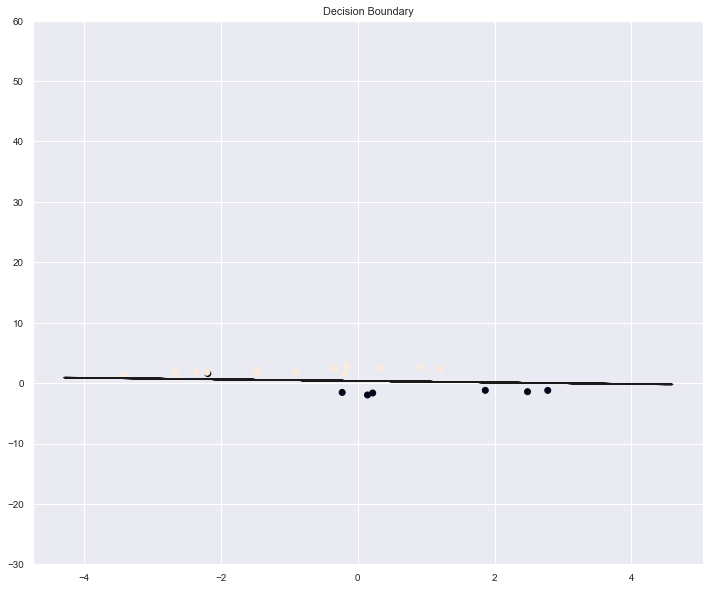

In [217]:
plt.figure(figsize = (12,10))

plt.scatter(x_2_test_pca[:, 0], x_2_test_pca[:, 1], c=pred)

y_vals = intercept + (slope * x_2_train_pca[:, 0])

plt.plot(x_2_train_pca[:, 0], y_vals, c="k")


plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

In [219]:
precision = precision_score(y_2_test, pred)
precision

0.2857142857142857

### 2. Regresión Logística + Ridge

In [221]:
rg_R = SGDClassifier(loss = 'log', l1_ratio=0.01, verbose=1, penalty='l2', max_iter=10000)
rg_R.fit(x_2_train_pca, y_2_train)

-- Epoch 1
Norm: 47.39, NNZs: 6, Bias: -2.419633, T: 83, Avg. loss: 24.145928
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 46.21, NNZs: 6, Bias: -13.734173, T: 166, Avg. loss: 21.725994
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 41.46, NNZs: 6, Bias: -12.959857, T: 249, Avg. loss: 16.325582
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 48.91, NNZs: 6, Bias: -5.853612, T: 332, Avg. loss: 15.632418
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 28.32, NNZs: 6, Bias: -19.480309, T: 415, Avg. loss: 17.676797
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 37.77, NNZs: 6, Bias: 6.635184, T: 498, Avg. loss: 15.402782
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 37.41, NNZs: 6, Bias: -21.536312, T: 581, Avg. loss: 16.086656
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 36.76, NNZs: 6, Bias: -10.817661, T: 664, Avg. loss: 17.352235
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 33.89, NNZs: 6, Bias: -31.953423, T: 747, Avg. loss: 8.914816
Total 

SGDClassifier(l1_ratio=0.01, loss='log', max_iter=10000, verbose=1)

In [223]:
intercept_R = -(rg_R.intercept_/rg_R.coef_[0][1])
print(intercept_R)

[2.09038972]


In [224]:
slope_R = -(rg_R.coef_[0][0]/ rg_R.coef_[0][1])
print(slope_R)

-1.5267351885782556


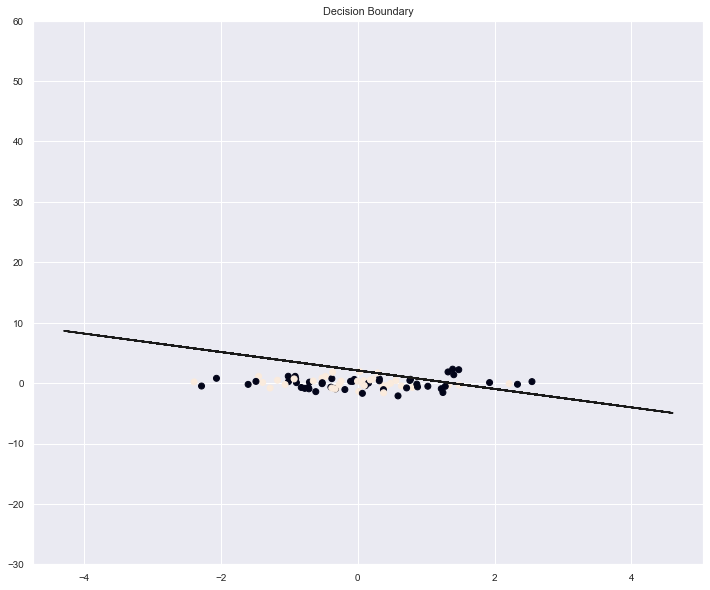

In [231]:
plt.figure(figsize=(12,10))
plt.scatter(x_2_train_pca[:, 2], x_2_train_pca[:, 3], c=y_2_train[:])
y_vals_2 = intercept_R + (slope_R * x_2_train_pca[:, 0])
plt.plot(x_2_train_pca[:, 0], y_vals_2, c="k")
plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

In [227]:
pred_R = rg_R.predict(x_2_test_pca)

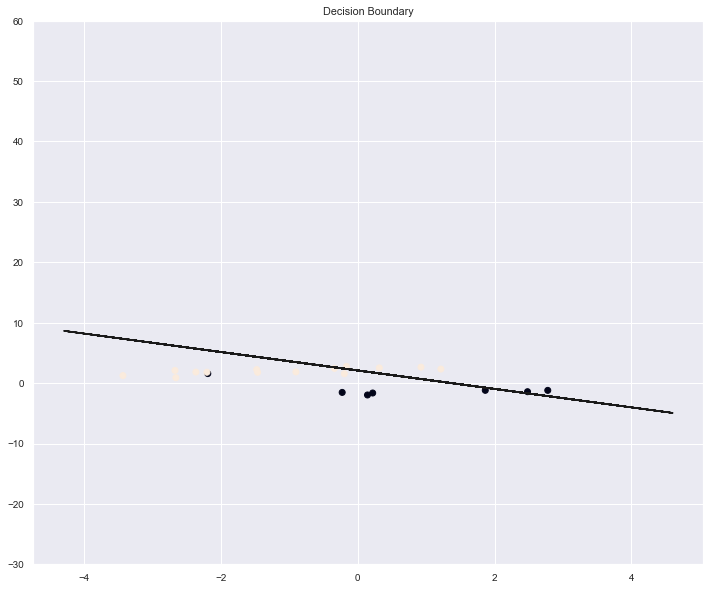

In [230]:
plt.figure(figsize = (12,10))

plt.scatter(x_2_test_pca[:, 0], x_2_test_pca[:, 1], c=pred)

y_vals_2 = intercept_R + (slope_R * x_2_train_pca[:, 0])

plt.plot(x_2_train_pca[:, 0], y_vals_2, c="k")


plt.title('Decision Boundary')
plt.ylim((-30, 60))
plt.show()

In [229]:
precision_R = precision_score(y_2_test, pred_R)
precision_R

0.5

Ambos modelos siguen siendo malos para la clasificación. Creo que tiene que ver con que las otras variables no aportan mucha información con respecto a la variable de salida como vimos con el coeficiente de Kendall. 